In [2]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression

# Scipy for statistics
import scipy
import arviz as az


# PyMC3 for Bayesian Inference
# import pymc3 as pm

In [3]:
import pymc as pm

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [78]:
# Importing dataset
columns = ['lenght_of_stay', 'age', 'infection_risk', 'routine_culturing_ratio', 'routine_xray_ratio', 'num_beds', 'med_school_affil', 'region', 'avg_census', 'num_nurses', 'avelbl_services']
df = pd.read_csv("data/dataset.txt", sep=" ", header=None, names=columns)
df.head()

,lenght_of_stay,age,infection_risk,routine_culturing_ratio,routine_xray_ratio,num_beds,med_school_affil,region,avg_census,num_nurses,avelbl_services
1,7.13,55.7,4.1,9.0,39.6,279,2,4,207,241,60.0
2,8.82,58.2,1.6,3.8,51.7,80,2,2,51,52,40.0
3,8.34,56.9,2.7,8.1,74.0,107,2,3,82,54,20.0
4,8.95,53.7,5.6,18.9,122.8,147,2,4,53,148,40.0
5,11.20,56.5,5.7,34.5,88.9,180,2,1,134,151,40.0


In [130]:
# Separating covariates and target
if 'infection_risk' in df.columns:
    Y = df.pop("infection_risk").astype(float)
X = df.astype(float)

In [131]:
print(X.mean())
print(X.std())


lenght_of_stay               9.648319
age                         53.231858
routine_culturing_ratio     15.792920
routine_xray_ratio          81.628319
num_beds                   252.168142
med_school_affil             1.849558
region                       2.362832
avg_census                 191.371681
num_nurses                 173.247788
avelbl_services             43.159292
dtype: float64
lenght_of_stay               1.911456
age                          4.461607
routine_culturing_ratio     10.234707
routine_xray_ratio          19.363826
num_beds                   192.842687
med_school_affil             0.359097
region                       1.009437
avg_census                 153.759564
num_nurses                 139.265390
avelbl_services             15.200861
dtype: float64


In [132]:
# Standardizing the covariates
X -= X.mean()
X /= X.std()

# Getting shape
N, D = X.shape
print("N:", N, "D:", D)
X

N: 113 D: 10


,lenght_of_stay,age,routine_culturing_ratio,routine_xray_ratio,num_beds,med_school_affil,region,avg_census,num_nurses,avelbl_services
1,-1.317487,0.553196,-0.663714,-2.170455,0.139139,0.418947,1.621862,0.101641,0.486497,1.107879
2,-0.433344,1.113532,-1.171789,-1.545579,-0.892791,0.418947,-0.359440,-0.912930,-0.870624,-0.207836
3,-0.684462,0.822157,-0.751650,-0.393947,-0.752780,0.418947,0.631211,-0.711316,-0.856263,-1.523551
4,-0.365333,0.104927,0.303583,2.126216,-0.545357,0.418947,1.621862,-0.899922,-0.181293,-0.207836
5,0.811780,0.732503,1.827808,0.375529,-0.374233,0.418947,-1.350091,-0.373126,-0.159751,-0.207836
...,...,...,...,...,...,...,...,...,...,...
109,1.125677,0.127340,-0.653943,1.821524,1.653326,-2.365816,-0.359440,1.623498,2.123659,1.298657
110,-0.077595,-0.881265,2.560609,-0.554039,-0.799450,0.418947,0.631211,-0.802368,-0.913707,-1.332773
111,-1.019285,0.822157,-0.351053,-0.708967,-0.638697,0.418947,1.621862,-0.691805,-0.267459,1.298657
112,4.337888,0.665263,1.036383,0.525293,3.022318,-2.365816,-1.350091,3.899779,1.678466,1.298657


In [86]:
# Defining model
basic_model = pm.Model()

with basic_model:
    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=10)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + pm.math.dot(X, beta)

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [87]:
# Sampling
run_sampling = False
if run_sampling:
    with basic_model:
        idata = pm.sample()
    az.to_netcdf(idata, 'models/model_results.nc')
    

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha, beta, sigma]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 6767 seconds.


In [133]:
# Load saved model
loaded_idata = az.from_netcdf('models/model_results.nc')


'models/model_results.nc'

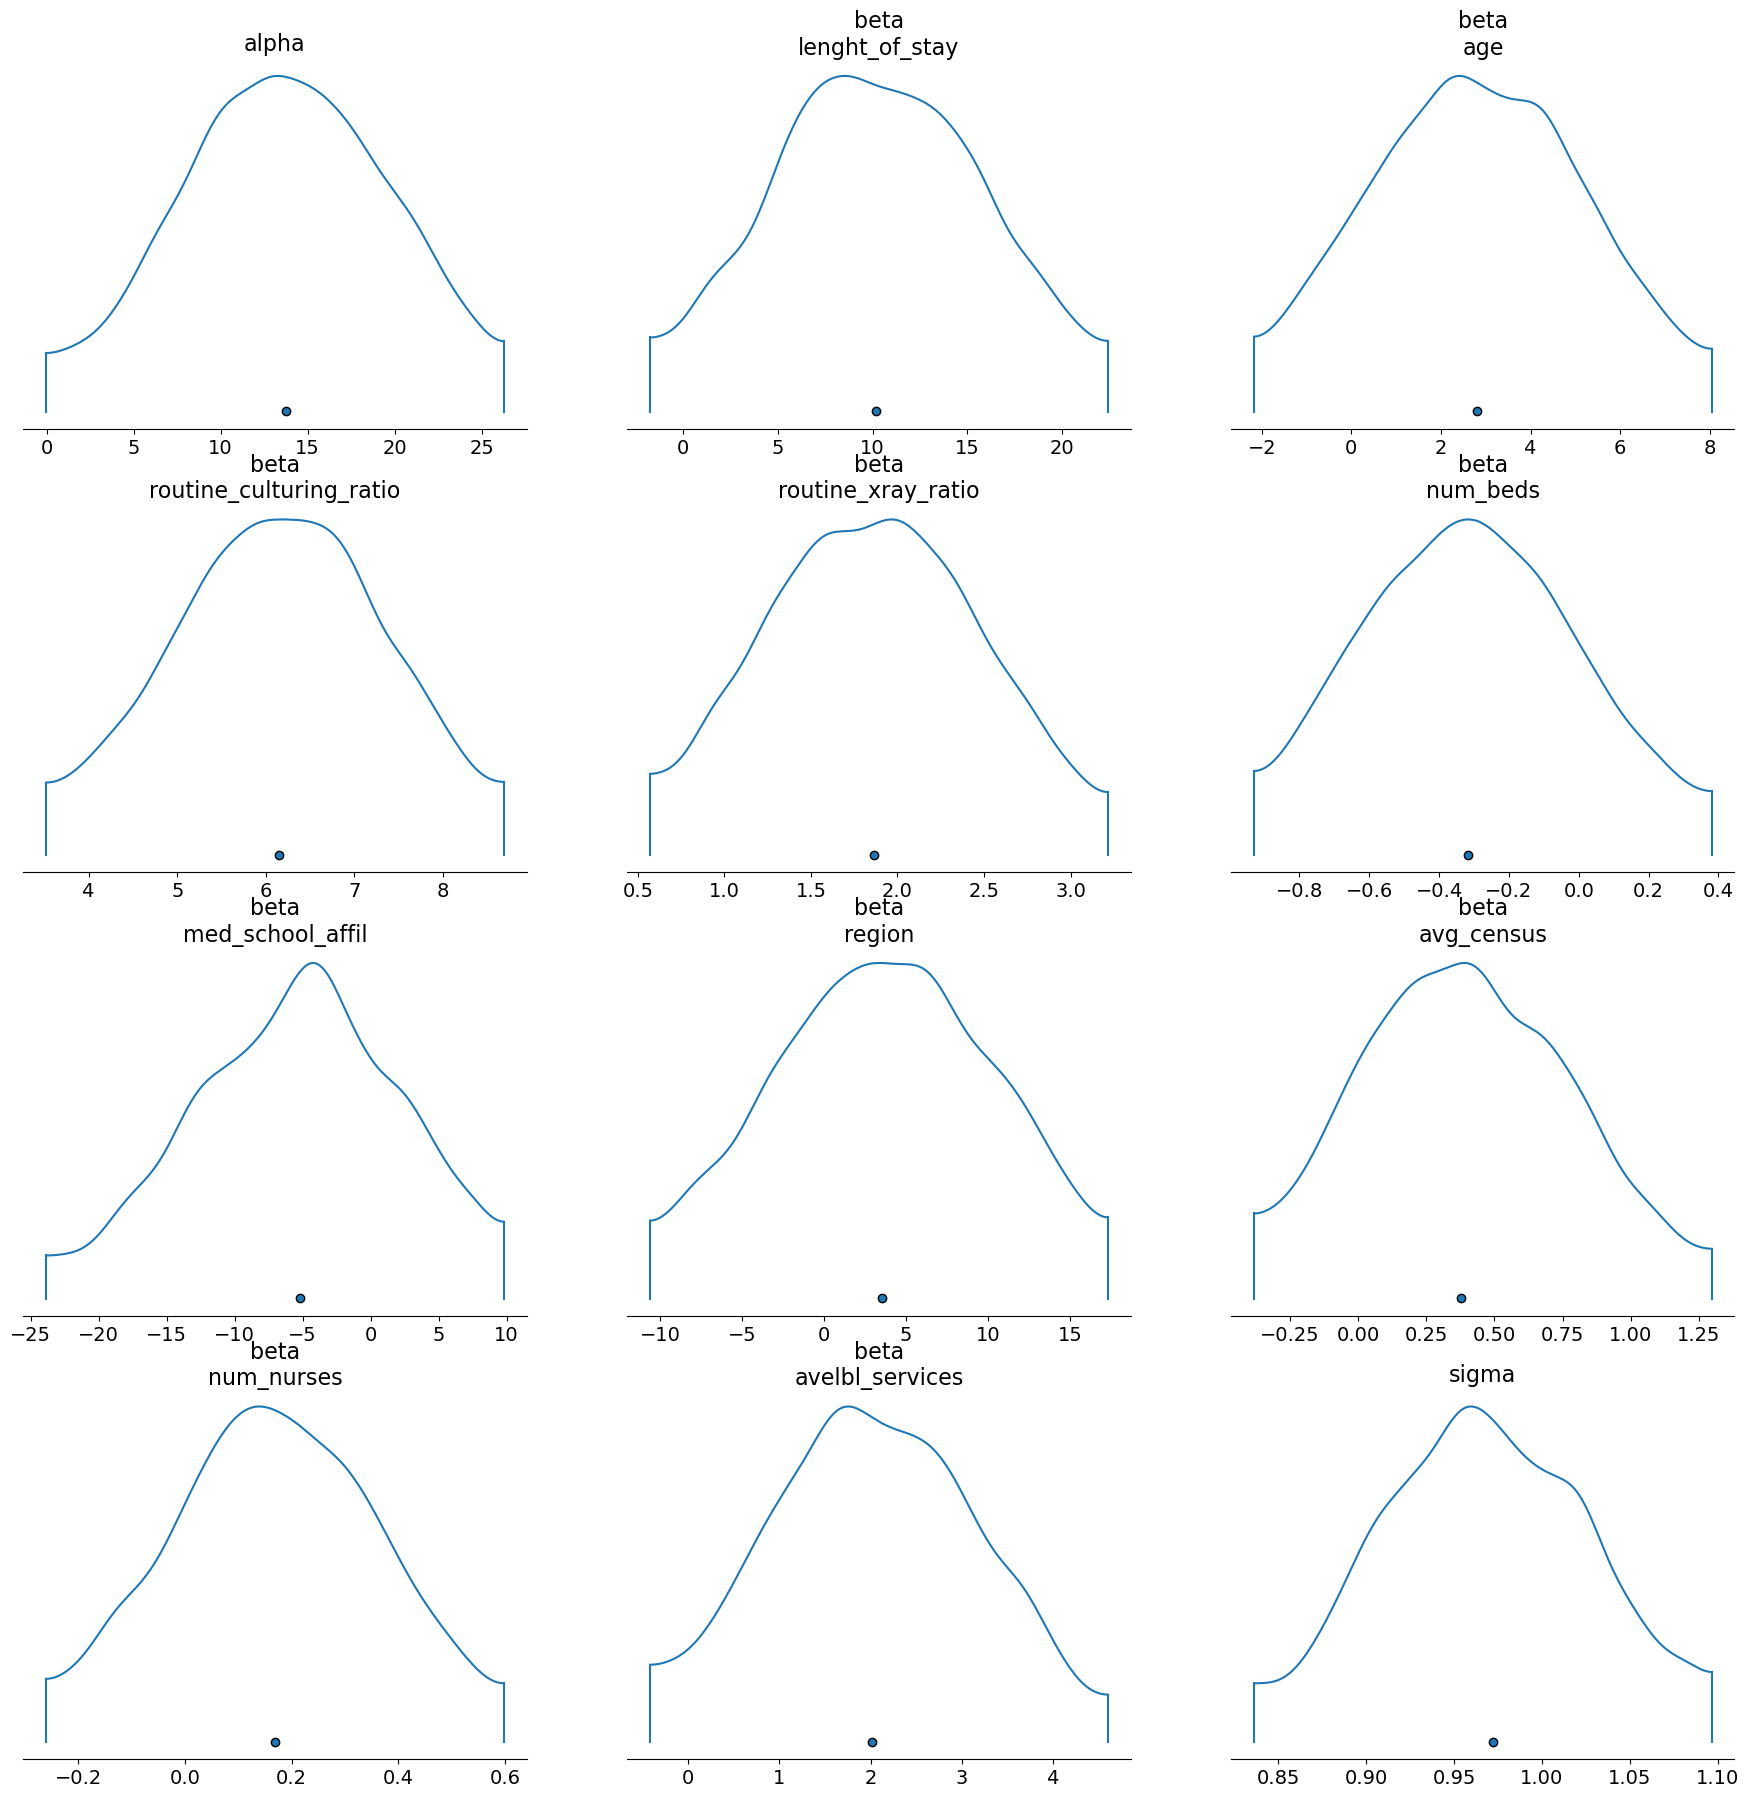

In [119]:
# Plot posterior densities of parameters
az.plot_density(idata, group='posterior', hdi_prob=0.95);

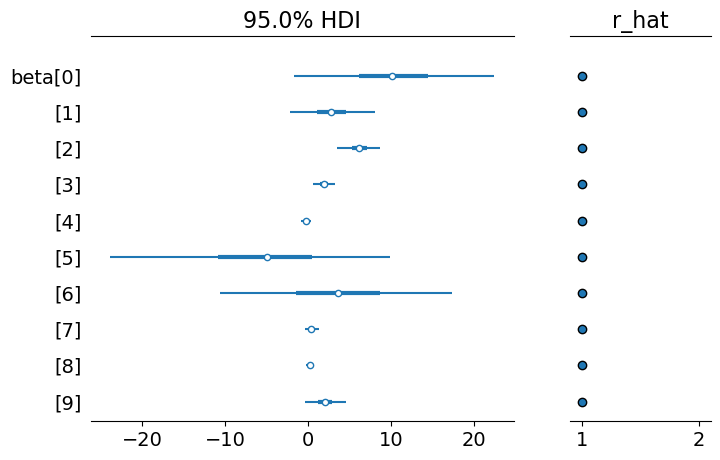

In [94]:
# Plot parameters for covariates
az.plot_forest(idata, var_names=["beta"], combined=True, hdi_prob=0.95, r_hat=True);

In [96]:
# Plot summary of parameters
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
alpha,13.78,6.67,0.68,25.77,0.14,0.10,2209.08,2323.03,1.0
beta[0],10.17,6.25,-1.42,21.85,0.13,0.09,2392.46,2870.09,1.0
beta[1],2.79,2.63,-2.14,7.64,0.05,0.03,3391.99,3001.35,1.0
beta[2],6.15,1.33,3.67,8.67,0.02,0.02,3349.63,2920.78,1.0
beta[3],1.86,0.68,0.60,3.13,0.01,0.01,3608.30,3188.99,1.0
beta[4],-0.32,0.34,-0.93,0.33,0.01,0.01,1949.78,2508.63,1.0
beta[5],-5.22,8.51,-22.43,9.71,0.17,0.12,2652.40,2441.83,1.0
beta[6],3.51,7.31,-10.40,16.57,0.14,0.10,2760.39,2853.68,1.0
beta[7],0.38,0.43,-0.39,1.21,0.01,0.01,1801.26,2322.36,1.0
beta[8],0.17,0.22,-0.27,0.55,0.00,0.00,3414.25,3038.46,1.0
